In [1]:

from data.data_preparation import prepare_data
import time

start = time.time()
prepare_data()
end = time.time() - start
print('Temps pour la préparation des données :', end)



Air quality data of bj prepared ！
Air quality data of ld prepared ！
Meteo data of bj prepared ！
Meteo data of ld prepared ！
Data splitted into training and test sets !
Temps pour la préparation des données : 493.2467360496521


### Sanity check of the prepared data :
##### We plot the matrices to check where the data is missing

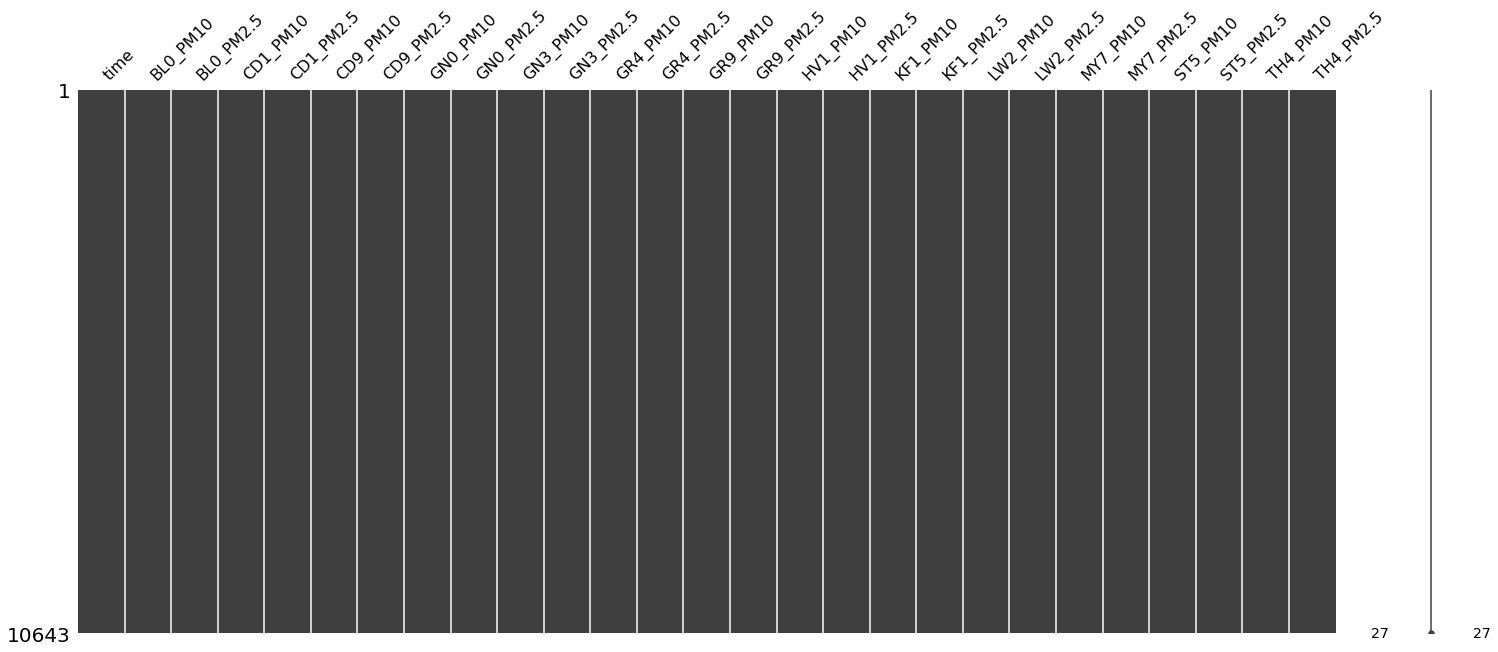

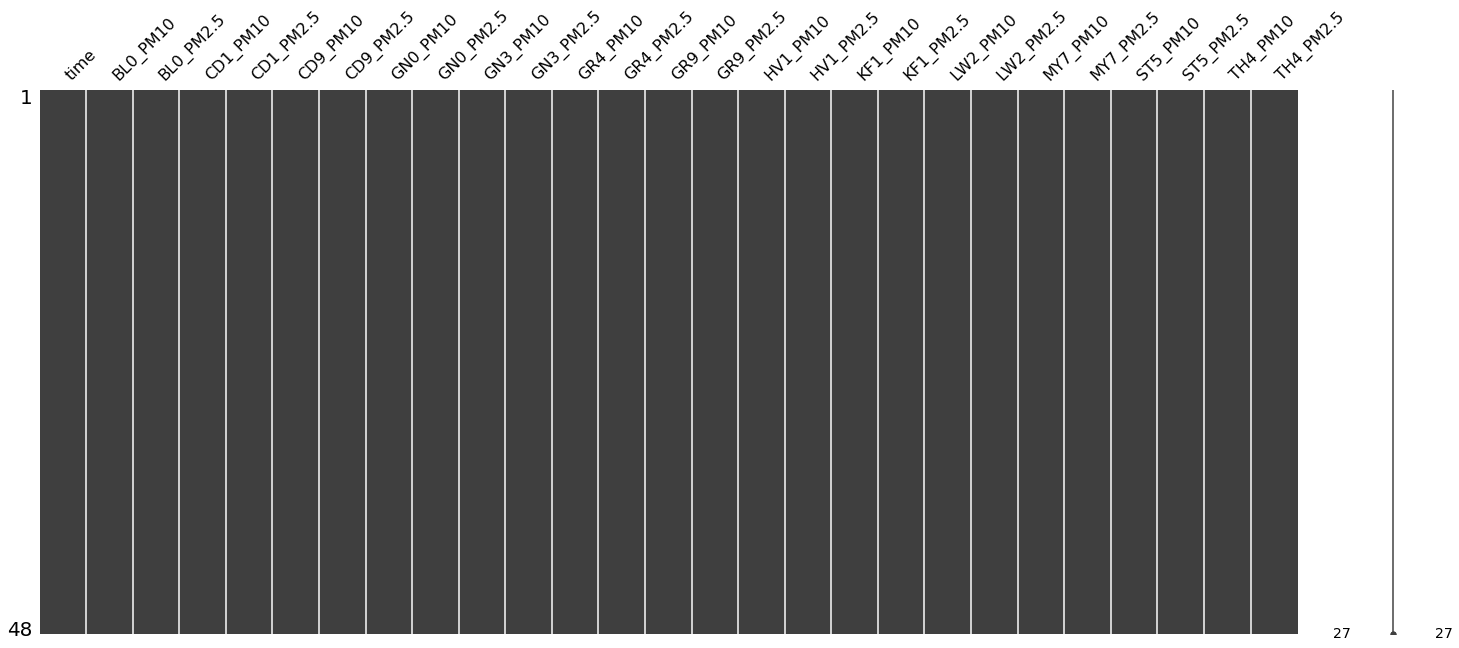

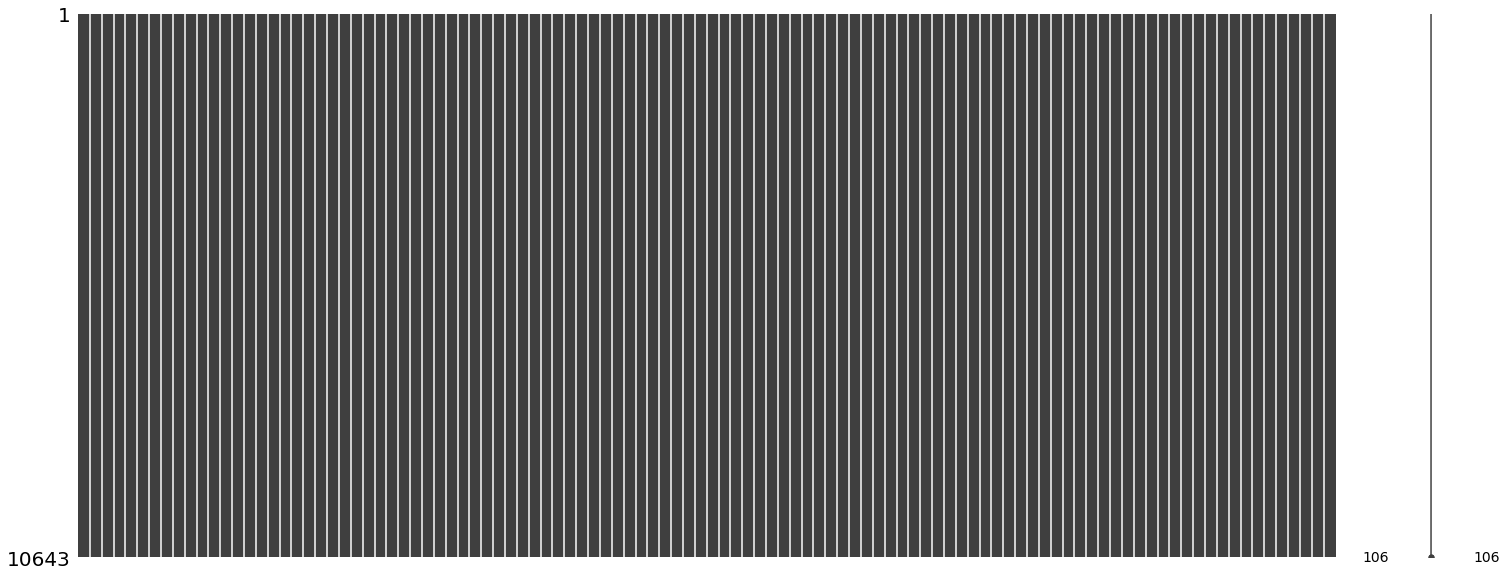

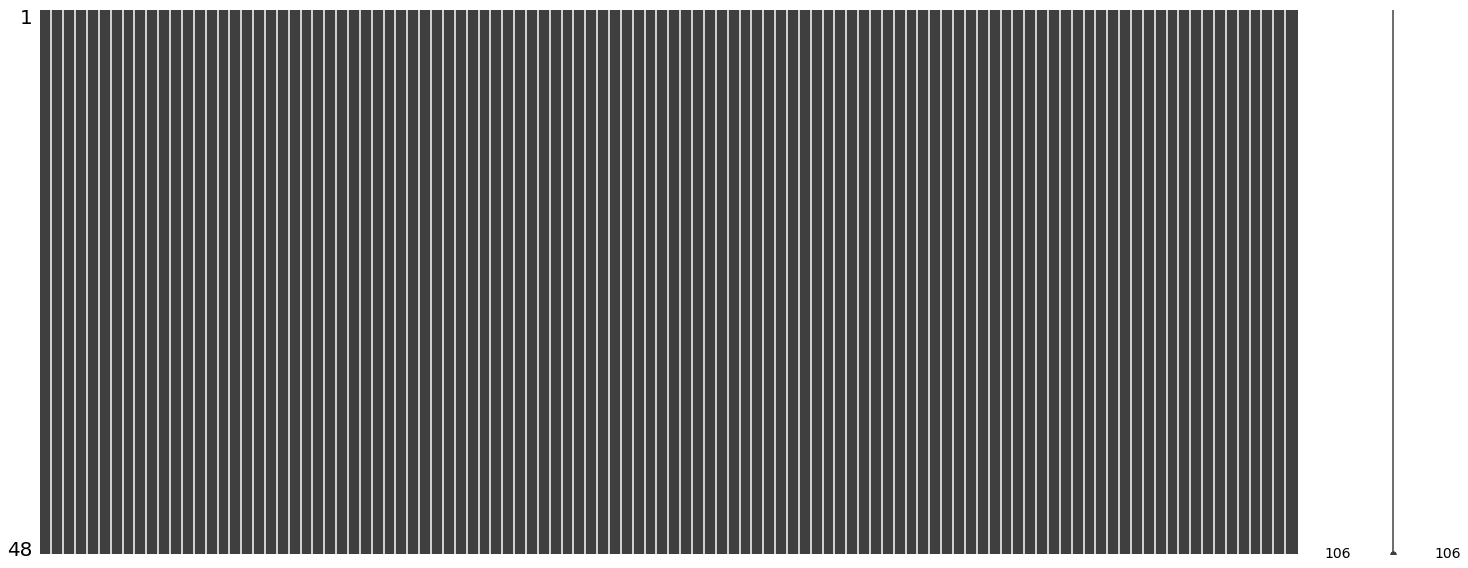

In [2]:
import pandas as pd
import missingno as mso

ld_aq_train_data = pd.read_csv('./prepared_data/ld_aq_train_data.csv')
ld_aq_test_data = pd.read_csv('./prepared_data/ld_aq_test_data.csv')
bj_aq_train_data = pd.read_csv('./prepared_data/bj_aq_train_data.csv')
bj_aq_test_data = pd.read_csv('./prepared_data/bj_aq_test_data.csv')

mso.matrix(ld_aq_train_data)
mso.matrix(ld_aq_test_data)
mso.matrix(bj_aq_train_data)
mso.matrix(bj_aq_test_data)

In [ ]:
from dummy_model.dummy_model import predict_dummy
import time

start = time.time()
predict_dummy()
end = time.time() - start
print('Temps pour la prédiction en utilisant LSTM :', end)

In [1]:
from LSTM_model.kerastest import predict_LSTM
import time

start = time.time()
predict_LSTM()
end = time.time() - start
print('Temps pour la prédiction en utilisant LSTM :', end)

Using TensorFlow backend.
BL0
CD1
CD9
GN0
GN3
GR4
GR9
HV1
KF1
LW2
MY7
ST5
TH4
aotizhongxin
badaling
beibuxinqu
daxing
dingling
donggaocun
dongsi
dongsihuan
fangshan
fengtaihuayuan
guanyuan
gucheng
huairou
liulihe
mentougou
miyun
miyunshuiku
nansanhuan
nongzhanguan
pingchang
pinggu
qianmen
shunyi
tiantan
tongzhou
wanliu
wanshouxigong
xizhimenbei
yanqin
yizhuang
yongdingmennei
yongledian
yufa
yungang
zhiwuyuan
-11310.89843583107


Predictions of dummy method results :
PM 2.5 RMSE in London : 5.090908933590334
PM 10 RMSE in London : 10.188018915525813
PM 2.5 RMSE in Beijing : 33.13905630131953
PM 10 RMSE in Beijing : 38.3251885056966
O3 RMSE in Beijing : 37.99370300270818
Predictions of lstm method results :
PM 2.5 RMSE in London : 7.199816828836248
PM 10 RMSE in London : 11.443660372709076
PM 2.5 RMSE in Beijing : 61.92966197206426
PM 10 RMSE in Beijing : 77.3246966719425
O3 RMSE in Beijing : 27.312180305068676


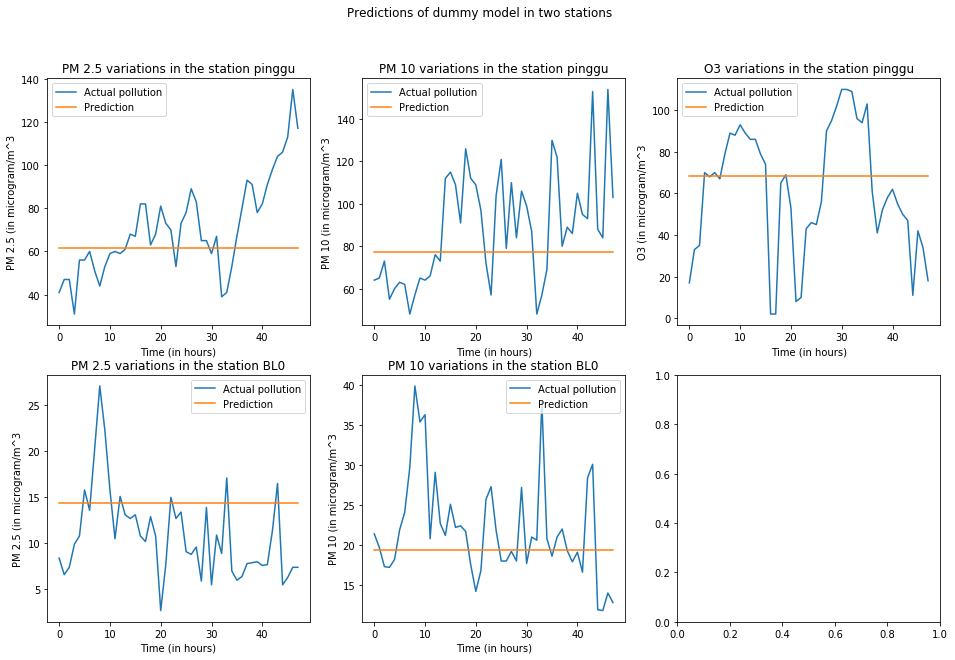

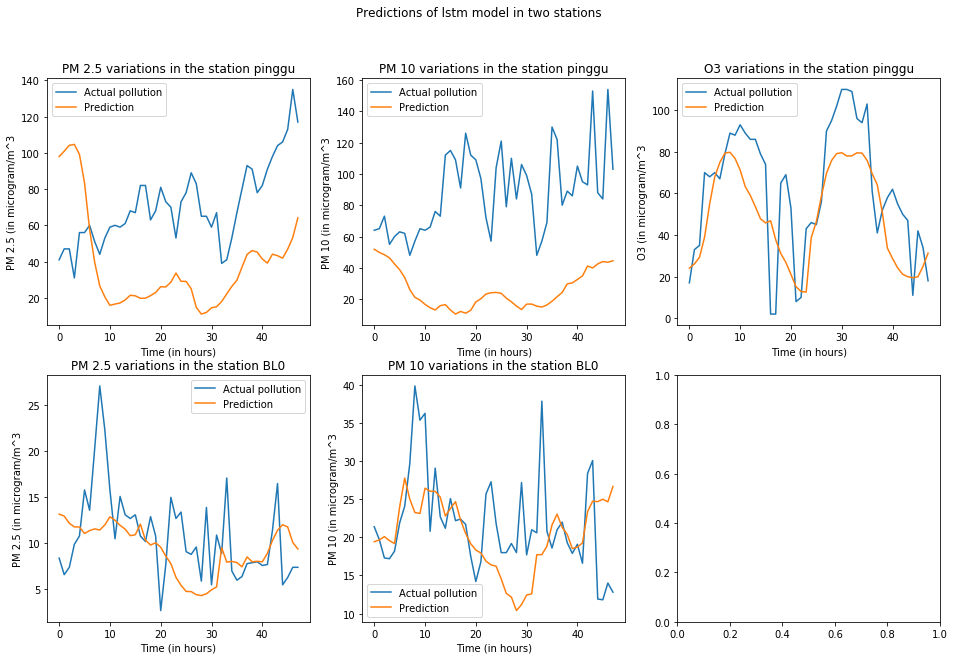

In [1]:
from prediction.compare_predictions import compare_predictions

methods = ['dummy', 'lstm']
for method in methods:
    compare_predictions(method)
